<a id='zad1'></a>
***Zadanie 1.***   
Oblicz błąd względny i bezwzględny aproksymacji liczby $p$ przy pomocy $p^{*}$:
  
1. $p=\pi,\ p^{*}=\frac{22}{7}$  
2. $p=\textrm{e},\ p^{*}=2.718$  
3. $p=10^{\pi},\ p^{*}=1397$  
4. $p=9!,\ p^{*}=\sqrt{18\pi}(\frac{9}{\textrm{e}})^9$

In [1]:
import math

p = [math.pi, math.e, 10**math.pi, math.factorial(9)]
_p = [22/7, 2.718, 1397, (18*math.pi)**(1/2) * (9/math.e)**9]

for i in range(0, len(p)):
    print('Błąd względny: {:.4%}, błąd bezwzględny: {:.6f}'.format(abs(p[i] - _p[i]) / abs(p[i]), abs(p[i] - _p[i])))

Błąd względny: 0.0402%, błąd bezwzględny: 0.001264
Błąd względny: 0.0104%, błąd bezwzględny: 0.000282
Błąd względny: 0.8332%, błąd bezwzględny: 11.544269
Błąd względny: 0.9213%, błąd bezwzględny: 3343.127158


***Zadanie 2.***  
Dany jest ciąg:  
  
$G(p)=\cfrac{1}{p}\left[10^{p}\left(1+p\pi \cdot 10^{-p}\right)-10^{p}\right],\ p=1,2,3,\dots,n $
  
gdzie liczba $\pi$ jest brana z dokładnością do 15 miejsc po przecinku. W tym celu należy użyć funkcji *[round](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.round_.html)*.
  
Napisz funkcję, która umożliwi obliczenie $n$ pierwszych wyrazów tego ciągu i zwróci je w postaci wektora. Analizując rozwiązania odpowiedz na następujące pytania:  
1. Czy wartość $G(p)$ obliczona w sposób analityczny zależy od $p$?
2. Oblicz błąd bezwzględny i względny otrzymanych wyników i przedstaw je na wykresie w zależności od $n$ - wartość błędu przedstaw w skali logarytmicznej.
3. Jak zmienia się błąd w zależności od $n$ i co można stwierdzić na podstawie jego zachowania? 
4. Jaki rodzaj błędu tutaj występuje?

In [2]:
pi = round(math.pi, 15)

def G(p: int) -> float:
    return 1/p * (10**p * (1 + p*pi * 10**(-p)) - 10**p)

def getNTerms(n: int) -> []:
    return [G(i) for i in range(1, n+1)]

print(getNTerms(20))

[3.141592653589793, 3.1415926535897967, 3.14159265358982, 3.1415926535901235, 3.1415926535904877, 3.1415926535846666, 3.1415926537343433, 3.1415926534682512, 3.1415926615397134, 3.1415927886962893, 3.141591852361506, 3.1416015625, 3.1415264423076925, 3.141741071428571, 3.1416666666666666, 3.25, 2.8235294117647056, 0.0, 0.0, 0.0]


1. Wartość $G(p)$ nie zależy od parametru $p$
\begin{align*}
G(p) &= \cfrac{1}{p}\left[10^{p}\left(1+p\pi \cdot 10^{-p}\right)-10^{p}\right] \\
G(p) &= \cfrac{1}{p}\left(10^{p}+p\pi -10^{p}\right) \\
G(p) &= \cfrac{1}{p} \cdot p\pi \\
G(p) &= \pi
\end{align*}

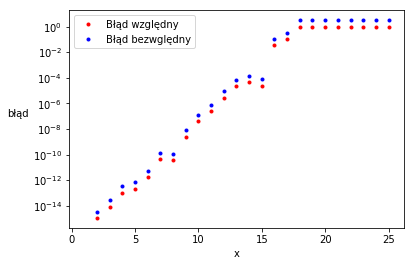

In [22]:
# 2. Oblicz błąd bezwzględny i względny otrzymanych wyników i przedstaw je na wykresie w zależności 
# od $n$ -wartość błędu przedstaw w skali logarytmicznej.

import matplotlib.pyplot as plt

x = [i for i in range(1, 26)]
y_abs = [abs(pi - G(i)) for i in x]
y_rel = [abs(pi - G(i)) / pi for i in x]

plt.xlabel('x')
plt.ylabel('błąd', rotation=0, ha="right")

plt.semilogy(x, y_rel, 'r.')
plt.semilogy(x, y_abs, 'b.')
plt.legend(["Błąd względny", "Błąd bezwględny"])

plt.show()

3. Jak zmienia się błąd w zależności od $n$ i co można stwierdzić na podstawie jego zachowania?

Rośnie wraz z $n$ do momentu aż $n = 18$
 
4. Jaki rodzaj błędu tutaj występuje?

W wyniku działania na liczbach o dużej rozbieżności występuje tutaj błąd zaokrąglenia ($1 + 10^{-15} \neq 1$, $1 + 10^{-16} = 1$)

***Zadanie 3.***  
Liczbę $\textrm{e}$ możemy zdefiniować jako $\sum\limits_{n=0}^{\infty} \frac{1}{n!}$. Oblicz błąd względny i bezwzględny aproksymacji liczby $\textrm{e}$ poprzez $\textrm{e}^{*}$ w przypadku gdy:
1. $\textrm{e}^{*}=\sum\limits_{n=0}^{5} \frac{1}{n!}$
2. $\textrm{e}^{*}=\sum\limits_{n=0}^{10} \frac{1}{n!}$

In [31]:
def e_aprox(n):
    return sum([1/math.factorial(i) for i in range(0, n+1)])

_e = [e_aprox(5), e_aprox(10)]

for e in _e:
    print("({:.16}) Błąd bezwzględny: {:.10f}, błąd względny: {:.6%}".format(e, abs(math.e - e), abs(math.e - e)/math.e))

(2.716666666666666) Błąd bezwzględny: 0.0016151618, błąd względny: 0.059418%
(2.718281801146385) Błąd bezwzględny: 0.0000000273, błąd względny: 0.000001%


***Zadanie 4.***  
Znajdź najmniejszą dodatnią wartość <i>b</i>, dla której poniższy kod wypisze poprawny wynik działania. Na tej podstawie określ liczbę bitów mantysy domyślnego typu zmiennoprzecinkowego w Pythonie. Z jakim rodzajem błędu numerycznego i na którym etapie mamy tu do czynienia?

In [40]:
a, b, n = 1, 1, 0

while(a + b != a):
    b /= 2
    n += 1

print("Liczba bitów mantysy:", n-1)

Liczba bitów mantysy: 52


Występuje tutaj 'underflow', wartość b jest mniejsza niż najmniejsza możliwa liczba zmiennoprzecinkowa w pythonie i w związku z tym przyjmuje wartość 0

***Zadanie 5.***  
Wiedząc, że
$\begin{aligned}
\sum_{n=1}^{\infty} \cfrac{1}{n^2} = \cfrac{1}{6} \pi^2
\end{aligned}$,
napisz jednolinijkowy kod w Pythonie obliczający przybliżenie liczby pi (nie korzystaj ze stałych <i>numpy.pi</i>, <i>math.pi</i> itp.). Z jakimi rodzajami błędów numerycznych mamy tu do czynienia?

In [57]:
pi = lambda n : math.sqrt( 6 * sum([i**(-2) for i in range(1, n)]) )

for i in range(1, 10):
    print(pi(i))

Jest to błąd obcięcia